In [211]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(readr)
library(repr)

In [212]:
url1<-"https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
url2<-"https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"

session_data <- read_csv(url1)
head(session_data,10)
players_data<-read_csv(url2)
head(players_data,10)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


In [213]:
#wrangling data
session_data_wrangle<-session_data|>             
                      mutate(start_time=dmy_hm(start_time),
                      end_time=dmy_hm(end_time)
                    )|>
              filter(!is.na(start_time)&!is.na(end_time))|>
              mutate(Duration=as.numeric(end_time-start_time,unit="mins")
                    )|>
              group_by(hashedEmail)|>
              mutate(frequency = n(),
                     total_duration=sum(Duration,na.rm=TRUE)
                    ) |>
              ungroup()

players_data_wrangle<-players_data|>
                      select(-individualId,-organizationName)|>
                      mutate(experience = as.factor(experience),
                             subscribe = as.factor(subscribe),
                             gender = as.factor(gender))|>
                      filter(!is.na(experience) & !is.na(played_hours) & !is.na(age))



         combined_data <- session_data_wrangle|>
                     left_join(players_data_wrangle, by = "hashedEmail")

  
          combined_data_1<-combined_data|>
               distinct(hashedEmail,start_time,.keep_all = TRUE)|>
               select(played_hours, name, gender, age,Duration,frequency, total_duration, experience, subscribe)|>
               distinct(name,.keep_all = TRUE)|>
               select(played_hours,gender,age,experience)

head(combined_data_1,10)

played_hours,gender,age,experience
<dbl>,<fct>,<dbl>,<fct>
223.1,Male,17,Regular
53.9,Male,17,Amateur
150.0,Female,16,Amateur
56.1,Male,23,Amateur
178.2,Female,19,Regular
2.0,Prefer not to say,27,Beginner
3.6,Male,10,Regular
218.1,Non-binary,20,Regular
32.0,Male,22,Amateur


In [222]:
# spliting data
set.seed(1004)
mc_data <- combined_data_1 |>
  mutate(played_degree = cut(
    played_hours,
    breaks = c(0, 1, 4, Inf),
    labels = c("Try","Play","Enjoy"),
    include.lowest = TRUE))
mc_split <- initial_split(mc_data,prop=0.80,strata=played_degree)
mc_training <- training(mc_split)
mc_testing <- testing(mc_split)

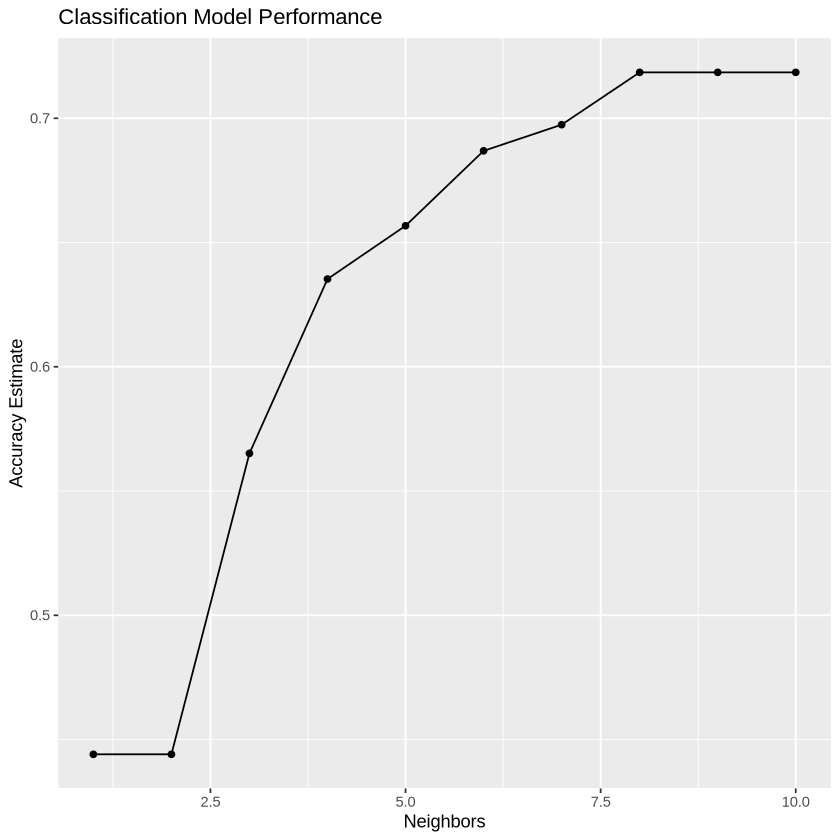

In [223]:
mc_recipe <- recipe(played_degree ~ ., data = mc_training) |>
  step_rm(played_hours) |>
  step_integer(all_predictors()) |> 
  step_scale(all_predictors()) |>
  step_center(all_predictors())

mc_vfold <- vfold_cv(mc_training, v = 5, strata = played_degree)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = mc_vfold, grid = k_vals) |>
  collect_metrics()|> 
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Classification Model Performance")
cross_val_plot
#we may choose k= 7

In [219]:

mc_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("classification")

mc_classification_results <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(mc_spec) |>
  fit(data = mc_training) |>
  predict(new_data = mc_testing)
mc_classification_results

.pred_class
<fct>
Try
Try
Try
Try
Try
Try
Try
Try
Try
